### SUPPORT VECTOR MACHINE

In [1]:
# IMPORT LIBRARY PACKAGES
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# LOAD GIVEN DATASET
data=pd.read_csv('hospital.csv')

In [4]:
df=data.dropna()

In [5]:
df.columns

Index(['outcome', 'age', 'BMI', 'heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Respiratory rate', 'temperature', 'SP O2',
       'Urine output', 'glucose', 'PH'],
      dtype='object')

In [6]:
df.head()

,outcome,age,BMI,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,glucose,PH
0,0.0,72,37.588179,68.837838,155.866667,68.333333,16.621622,36.714286,98.394737,2155.0,114.636364,7.230
2,0.0,83,26.572634,72.318182,135.333333,61.375000,23.640000,36.453704,95.291667,2425.0,149.000000,7.268
3,0.0,43,83.264629,94.500000,126.400000,73.200000,21.857143,36.287037,93.846154,8760.0,128.250000,7.370
4,0.0,75,31.824842,67.920000,156.560000,58.120000,21.360000,36.761905,99.280000,4455.0,145.750000,7.250
5,0.0,76,24.262293,74.181818,118.100000,52.950000,20.545455,35.266667,96.818182,1840.0,98.333333,7.310


In [7]:
df=df.rename({'heart rate':'heart_rate','Systolic blood pressure':'Systolic_blood_pressure',
              'Diastolic blood pressure':'Diastolic_blood_pressure','Respiratory rate':'Respiratory_rate',
              'SP O2':'SP_O2','Urine output':'Urine_output'},axis=1)

In [8]:
df.head()

,outcome,age,BMI,heart_rate,Systolic_blood_pressure,Diastolic_blood_pressure,Respiratory_rate,temperature,SP_O2,Urine_output,glucose,PH
0,0.0,72,37.588179,68.837838,155.866667,68.333333,16.621622,36.714286,98.394737,2155.0,114.636364,7.230
2,0.0,83,26.572634,72.318182,135.333333,61.375000,23.640000,36.453704,95.291667,2425.0,149.000000,7.268
3,0.0,43,83.264629,94.500000,126.400000,73.200000,21.857143,36.287037,93.846154,8760.0,128.250000,7.370
4,0.0,75,31.824842,67.920000,156.560000,58.120000,21.360000,36.761905,99.280000,4455.0,145.750000,7.250
5,0.0,76,24.262293,74.181818,118.100000,52.950000,20.545455,35.266667,96.818182,1840.0,98.333333,7.310


In [9]:
# preprocessing, split test and dataset, split response variable
X=df.drop(labels='outcome',axis=1)
# Response variable
y=df.loc[:,'outcome']

In [10]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros=RandomOverSampler(random_state=42)
x_ros,y_ros=ros.fit_resample(X,y)
print('OUR DATASET COUNT        :',Counter(y))
print('OVER SAMPLING DATA COUNT :',Counter(y_ros))

OUR DATASET COUNT        : Counter({0.0: 608, 1.0: 101})
OVER SAMPLING DATA COUNT : Counter({0.0: 608, 1.0: 608})


In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_ros,y_ros,test_size=36,random_state=130)
print('Number of training dataset:',len(X_train))
print('Number of test dataset    :',len(X_test))
print('Total number of dataset   :',len(X_train)+len(X_test))

Number of training dataset: 1180
Number of test dataset    : 36
Total number of dataset   : 1216


In [28]:
# Implementing SVC logo
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,plot_confusion_matrix

In [29]:
# Training
svc=SVC()
svc.fit(X_train,y_train)
predicted=svc.predict(X_test)

In [30]:
# Finding Accuracy
accuracy=accuracy_score(y_test,predicted)
print('Accuracy of Support Vector Classifier',accuracy*100)

Accuracy of Support Vector Classifier 91.66666666666666


In [31]:
# Finding Classification Report
cr=classification_report(y_test,predicted)
print('Classification report\n\n',cr)

Classification report

               precision    recall  f1-score   support

         0.0       0.94      0.88      0.91        17
         1.0       0.90      0.95      0.92        19

    accuracy                           0.92        36
   macro avg       0.92      0.91      0.92        36
weighted avg       0.92      0.92      0.92        36



In [32]:
# Finding Confusion Matrix
cm=confusion_matrix(y_test,predicted)
print('Confusion matrix\n\n',cm)

Confusion matrix

 [[15  2]
 [ 1 18]]


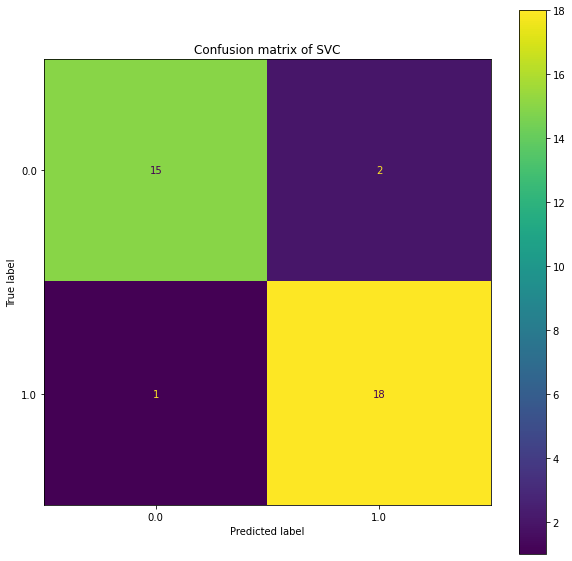

In [33]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(10,10))
plot_confusion_matrix(svc,X_test,y_test,ax=ax)
plt.title('Confusion matrix of SVC')
plt.show()

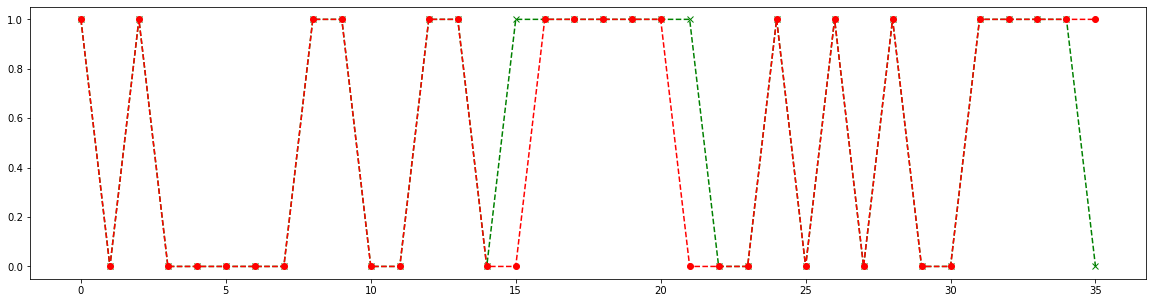

In [34]:
df2=pd.DataFrame()
df2['y_test']=y_test
df2['predicted']=predicted
df2.reset_index(inplace=True)
plt.figure(figsize=(20,5))
plt.plot(df2['predicted'][:100],marker='x',linestyle='dashed',color='green')
plt.plot(df2['y_test'][:100],marker='o',linestyle='dashed',color='red')
plt.show()